<font size="5">Exploration and Visualization of I94 Highway Westbound Traffic Dataset</font>

Goal is to use python statistics and visualization tools to draw insights from this dataset, and see what may be some factors that are causing traffic on this specific highway.

Please find dataset here from UCI ML Repository: https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

In [1]:
import pandas as pd
import numpy as np

i94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')
i94.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i94.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


No null values

We have 9 columns

We have 48,204 entries between 2012-10-02 09:00:00	and 2018-09-30 23:00:00	

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

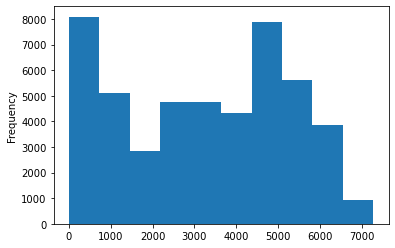

In [5]:
i94['traffic_volume'].plot.hist()

In [6]:
i94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The lower 25% of our instances fell under a traffic volume score of 1,193. The upper 25% were scored 4,933 and above. The total average traffic volume score is about 3,260. 

Day time and night should definitely have an affect on Westbound traffic on the i94. Let's examine that next. 

In [7]:
i94['date_time'] = pd.to_datetime(i94['date_time'])

In [8]:
daytime = i94[(i94['date_time'].dt.hour >= 6) & (i94['date_time'].dt.hour < 18)]
nighttime = i94[(i94['date_time'].dt.hour < 6) | (i94['date_time'].dt.hour >= 18)]             

Text(0.5, 0, 'Traffic Volume')

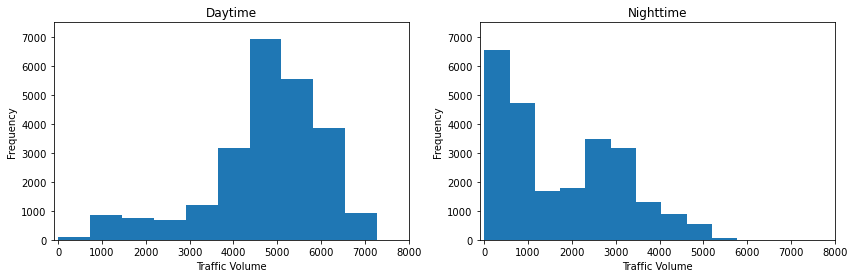

In [9]:
plt.figure(figsize=(14,4))

plt.subplot(1, 2, 1)
daytime['traffic_volume'].plot.hist()
plt.title('Daytime')
plt.xlim(-100,8000)
plt.ylim(0, 7500)
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
nighttime['traffic_volume'].plot.hist()
plt.title('Nighttime')
plt.xlim(-100,8000)
plt.ylim(0, 7500)
plt.xlabel('Traffic Volume')

In [10]:
daytime['traffic_volume'].describe()

count    23978.000000
mean      4749.223997
std       1314.402414
min          1.000000
25%       4269.000000
50%       4923.000000
75%       5660.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
nighttime['traffic_volume'].describe()

count    24226.000000
mean      1785.659663
std       1332.692347
min          0.000000
25%        530.000000
50%       1414.000000
75%       2880.000000
max       5773.000000
Name: traffic_volume, dtype: float64

As expected Nighttime traffic volume is right skewed indicating a tendency for much lower traffic volume. Daytime traffic volume is right skewed showing many instances of higher traffic volume. This makes sense given there will be more people driving during the daytime. For our study we want to find out indicators of heavy traffic, and it is possible we focus specifically on daytime data. We can exclude nighttime data, however it would be interesting to find out what instances may be affecting traffic during the night time hours. Moving forward we will focus on daytime data.

<ipython-input-12-b01b7eba5ee2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['month'] = daytime['date_time'].dt.month


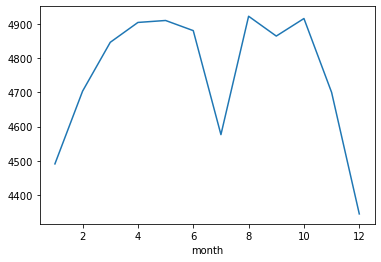

In [12]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

We are seeing less traffic in the winter months, however there is large dip right in the middle of summer in July time. We see traffic increasing from the beginning of the year peaking in April and May, a decrease in traffic during the summertime and a huge peak in August. High Traffic volume stays high until October and drastically drops the rest of the year. Let's look at July traffic volume each year. 

<ipython-input-13-778d74b3713d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['year'] = daytime['date_time'].dt.year


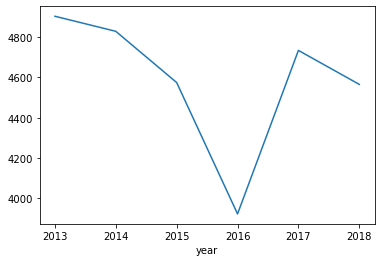

In [13]:
daytime['year'] = daytime['date_time'].dt.year
only_july = daytime[daytime['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

We have a large anomaly in 2016 where July traffic was extremely low. 

<ipython-input-14-3594305bb2cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['dayofweek'] = daytime['date_time'].dt.dayofweek


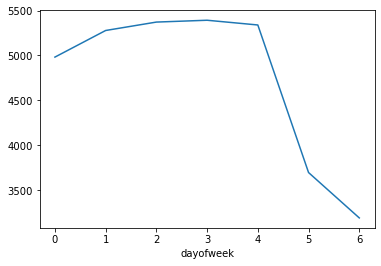

In [14]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Traffic volume during weekdays is much higher than on the weekends. 

In [17]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
6     5365.983210
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
Name: traffic_volume, dtype: float64
hour
6     1089.100334
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
Name: traffic_volume, dtype: float64


<ipython-input-17-f8473ede9f01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['hour'] = daytime['date_time'].dt.hour


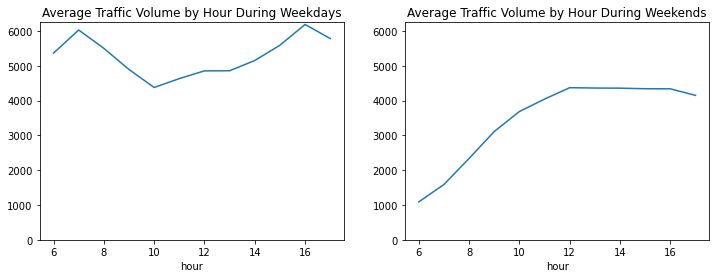

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Average Traffic Volume by Hour During Weekdays')
plt.ylim(0,6250)

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Average Traffic Volume by Hour During Weekends')
plt.ylim(0,6250)
plt.show()

Traffic is clearly higher during business days or weekedays. On both weekdays and weekends we see a general increase in traffic from 10am to later in the day. During the weekday we see heavier traffic just past 6am peaking at around 7am and decreasing from there. Traffic is low in the morning during weekends. Weekend traffic stays below weekdays traffic during all hours of the day. During weekdays we see two peaks in traffic at around 7am and 4pm which is during rush hour time.

In [23]:
daytime.corr()['traffic_volume']

temp              0.131734
rain_1h           0.003192
snow_1h           0.001751
clouds_all       -0.017816
traffic_volume    1.000000
month            -0.020676
year              0.001562
dayofweek        -0.464383
hour              0.278076
Name: traffic_volume, dtype: float64

Temp has the highest correlation to traffic volume. rain_1h, snow_1h, and clouds_all the other numerical weather columns have a very weak correlation to traffic volume.

Text(0, 0.5, 'Temperature')

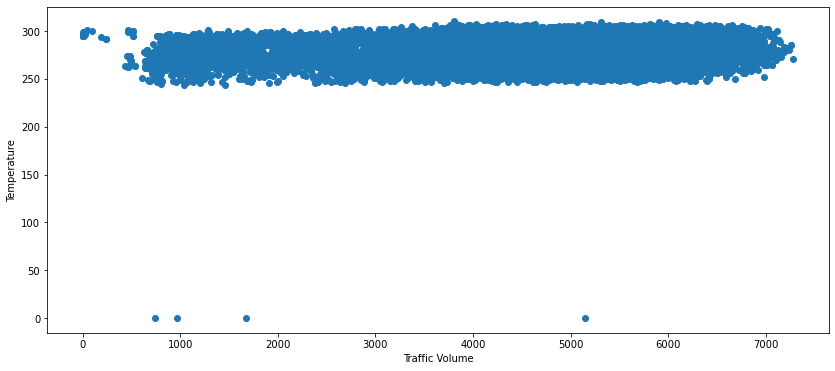

In [27]:
plt.figure(figsize=(14,6))
plt.scatter(daytime['traffic_volume'], daytime['temp'])
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')

This resembles a more uniform distribution, and can't really say temperature is a factor for volume of traffic. On glance, it doesn't look like any of the numerical weather columns are great indicatores of traffic volume.

In [28]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

<AxesSubplot:ylabel='weather_main'>

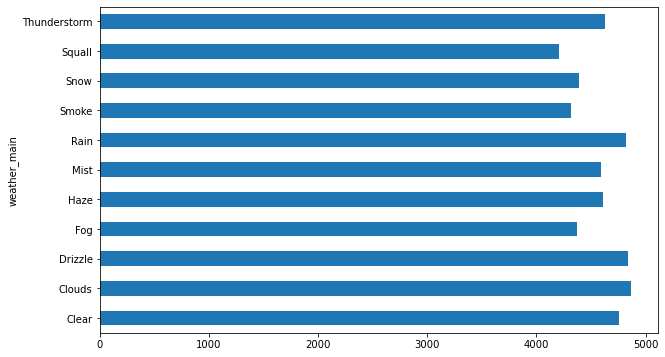

In [32]:
plt.figure(figsize=(10,6))
by_weather_main['traffic_volume'].plot.barh()

<AxesSubplot:ylabel='weather_description'>

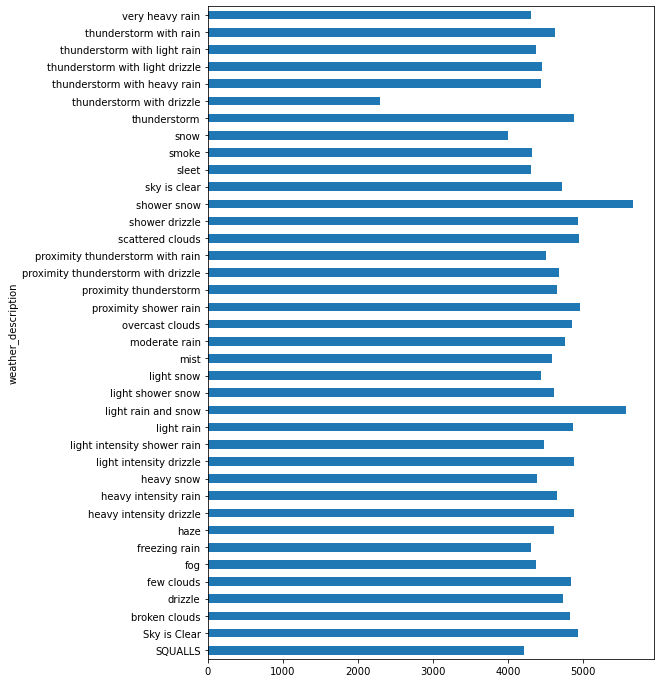

In [38]:
by_weather_description['traffic_volume'].plot.barh(figsize=(8,12))

When looking at average traffic volume by weather description categories, we find 'shower snow' and 'light rain and snow' have traffic volumes exceeding 5,000 cars. Seems shower snow and light rain/snow are idicators of higher traffic. 

<font size="5">Conclusion:</font>

The goal of our project was to find indicators of heavy traffic going westboun on higheway i94.
We were able to see a few trends

Time factors
Traffic is usually heavier during warmer months (March–October) compared to winter months (November–February).
Traffic is heavier on business days compared to the weekends.
Peak traffic hours during business days are at 7am and 4pm.

Weather factors
Shower snow
Light rain and snow
Proximity shower rain